# TSF Internship Program Task-2

## Prediction using Unsupervised ML (by Vikas Malik)

In [3]:
##Importing important libraries---

import warnings
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('Iris.csv')
df.drop(['Id'],axis=1,inplace=True)
print("Data is successfully imported")

Data is successfully imported


### Reading the Dataset

In [7]:
## Print the Dataset...

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
## Now print the first 5 records...

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
## Now print the last 5 records...

df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
## Check the shape of the Dataset...

df.shape

(150, 5)

In [15]:
## Display summary statistics using describe()...

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
## Display concise summary of DataFrame using info()...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
## Count missing values in each column...

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
## Remove duplicate rows from the Dataset...

df.drop_duplicates(inplace=True)

### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

Species
1    50
2    49
0    48
Name: count, dtype: int64

### PetalLengthCm vs PetalWidthCm 
>*We'll compare our final plot with this graph to check how accurate our model is*

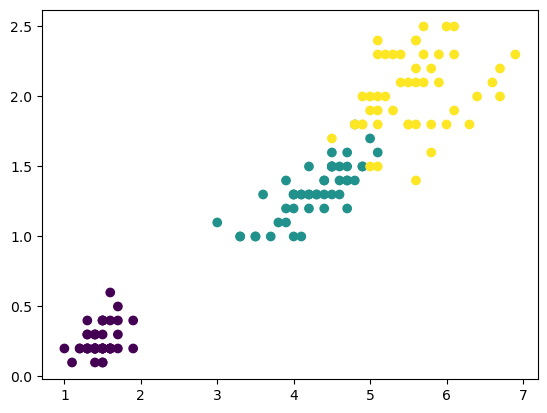

In [25]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

In [27]:
## Compute pairwise correlation of columns...

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


### Data Visualization

<Axes: >

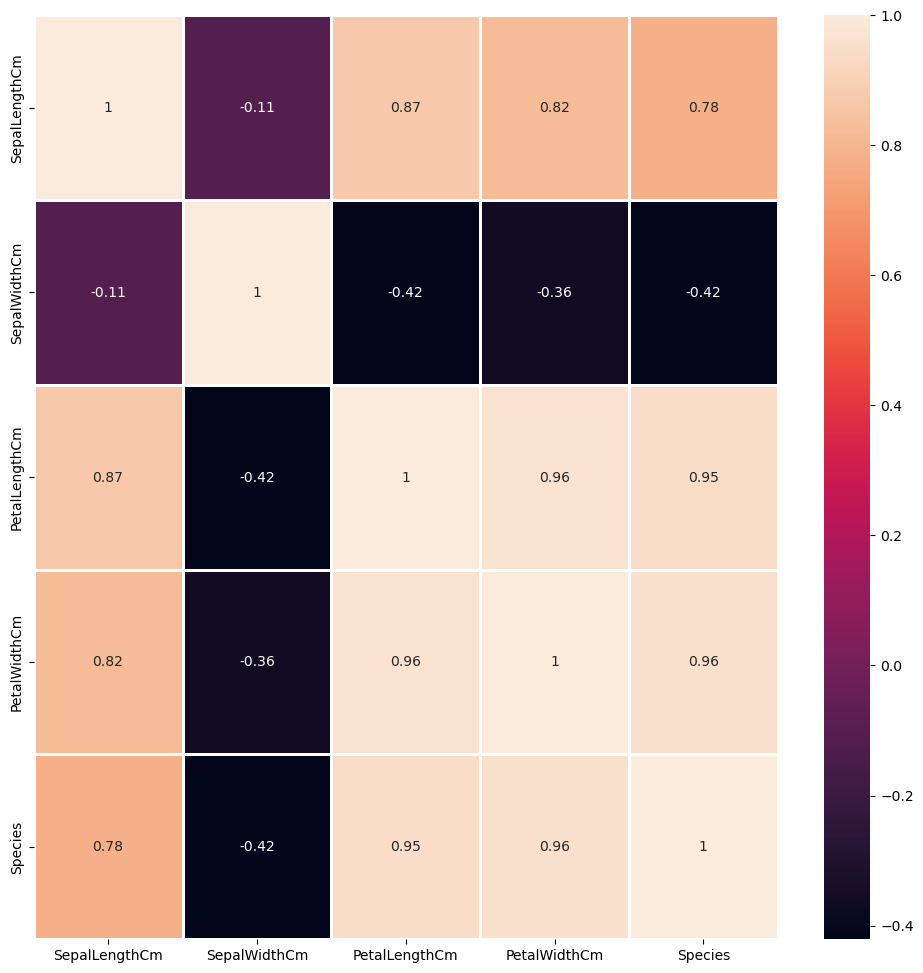

In [31]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

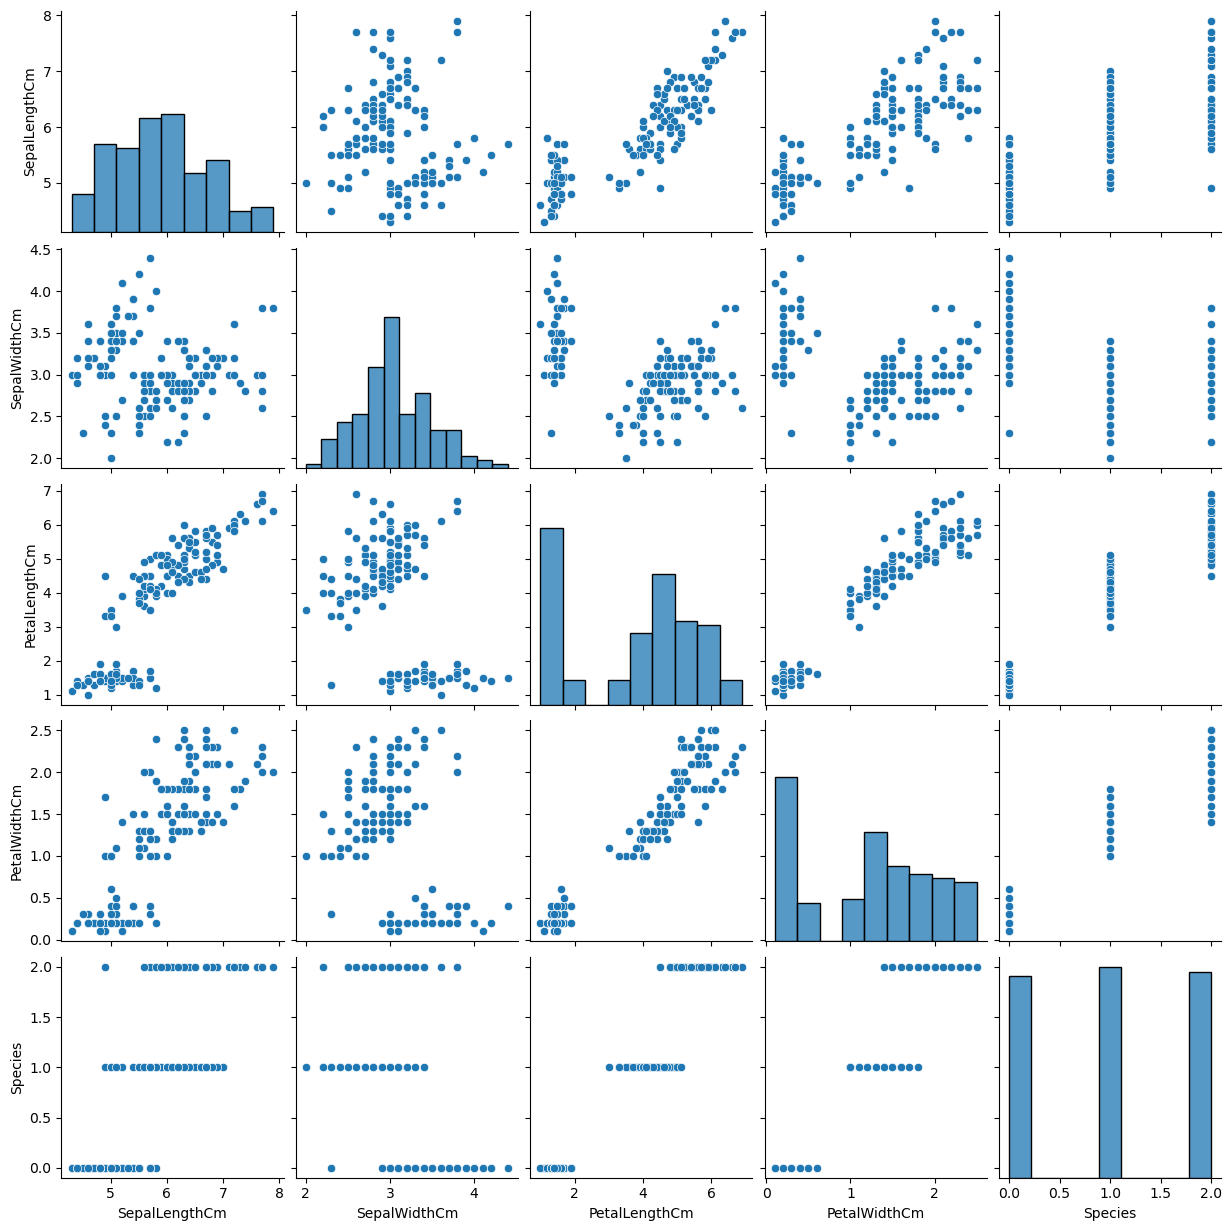

In [35]:
## Plot pairwise relationships...

sns.pairplot(df)

>We can see that Species is mainly depend on Petal Length and Petal Width.

>Using petal_length and petal_width

In [37]:
df=df.iloc[:,[0,1,2,3]].values

### Elbow Method using within-cluster-sum-of-squares(wcss) 

In [41]:
## Suppress specific warnings...

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[663.8952380952381,
 151.77145833333333,
 77.92126282051282,
 56.64237065018315,
 45.81642192982456,
 38.380978808131445,
 34.16578306878307,
 35.48508364184835,
 28.04964052015523,
 26.738662106412107]

### Using Elbow graph to find optimum no. of Clusters

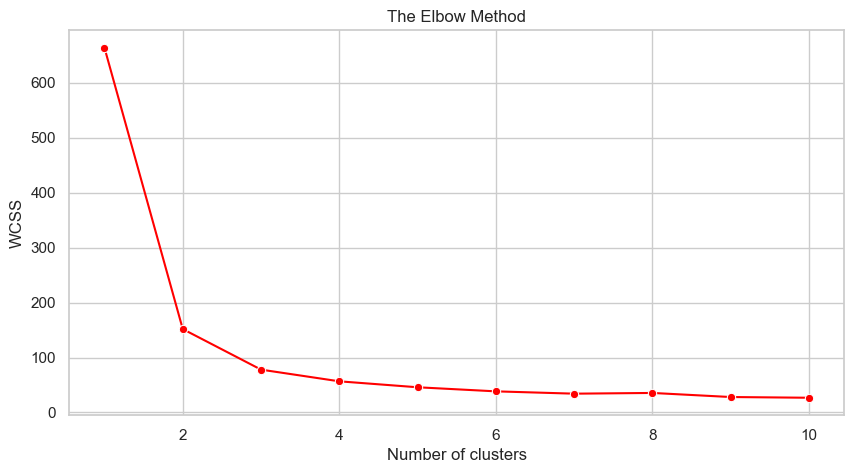

In [47]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')

## Lineplot call
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

>The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

### Initialization using K-means++

In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

### Visualizing the Clusters 

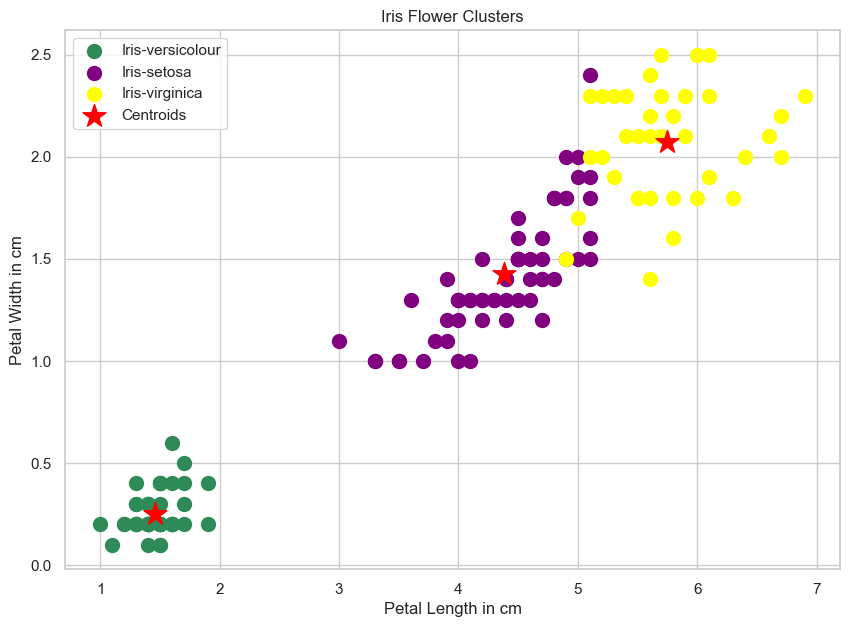

In [51]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

>We can see that our predicted graph is quite similar to the actual one.